The SQLite db file - company.db has been loaded to database and dumped all the three tables(clients,transactions and campaigns) as respective CSV files .Below are codes in python that i have used to analyze the data . 

In [1]:
import pandas as pd
import os
import  matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
df_campaigns=pd.read_csv("campaigns.csv")

df_clients=pd.read_csv("clients.csv")
 

df_transactions=pd.read_csv("transactions.csv")
 

As per document , company mostly interested in total_spend and total_buy and coupons used for country for making profit ,so will analyze the data on these

check on campaign data

In [14]:
df_campaigns.head(5)

,start_date,end_date,total_spend,country
0,2017-01-03,2017-01-04,9935.67,NaN
1,2017-01-04,2017-01-06,17696.41,id
2,2017-01-08,2017-01-12,22541.26,in
3,2017-02-13,2017-02-18,745.89,ng
4,2017-05-02,2017-05-03,15338.78,id


from document NaN represents for global campaigns

check the maximum amount spend for campaigns

In [3]:
df_campaigns["total_spend"].max()


29866.08

In [4]:
df_campaigns["total_spend"].min()

745.89

In [5]:
%matplotlib inline

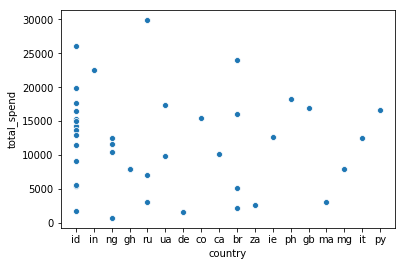

In [6]:
ax = sns.scatterplot(x="country", y="total_spend", data=df_campaigns)

now to check the number of campaigns conducted for country wise 

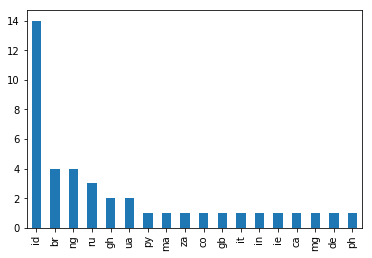

In [7]:
df_campaigns['country'].value_counts().plot.bar()


from above plot 'id' country has max , then 'br' ,'ng','ru', we will analyze this top four countries on total money spend and total buy during these campigns to gain insight on data , which country performs well on campaigns

total amount spend top 4 countries 

In [8]:
df_campaigns.groupby('country')['total_spend'].sum()['id'] 


184919.92

In [9]:
df_campaigns.groupby('country')['total_spend'].sum()['ng'] 


35351.0

In [10]:
df_campaigns.groupby('country')['total_spend'].sum()['br'] 


47229.13

In [11]:
df_campaigns.groupby('country')['total_spend'].sum()['ru'] 


40109.58

now lets check on client data

In [12]:
df_clients.head(5)

,account,type,residence,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount
0,5019,type_6,ua,2018-06-18,308,9090.91,2018-06-18,NaN,NaN,9090.91
1,3655,type_6,ve,2017-09-04,83,9090.91,2017-09-04,0.120000,2017-09-04,-191834.62
2,2809,type_6,br,2017-01-16,308,9090.91,2017-01-16,0.205556,2017-01-16,-3679886.14
3,3876,type_6,mm,2017-11-01,232,9090.91,2017-11-01,NaN,NaN,-90909.09
4,4973,type_6,lk,2018-06-09,308,9090.91,2018-06-09,0.110000,2018-06-11,8974.12


lets check residence of the clients they belong to 

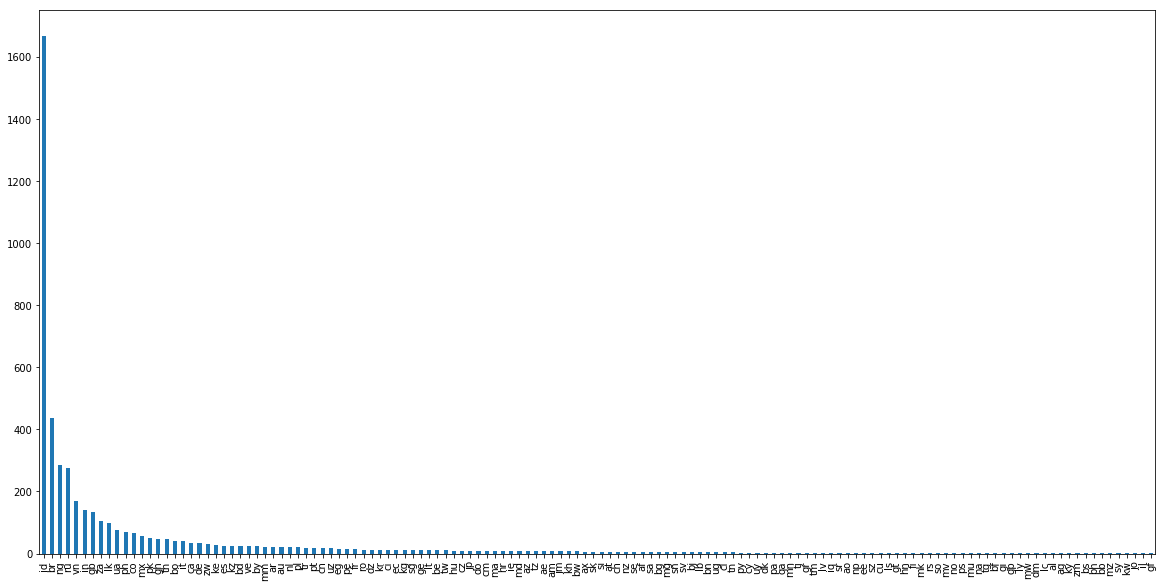

In [27]:

df_clients['residence'].value_counts().plot.bar(figsize=(20,10))

from the above plot , id ,br,ng,ru has maximumn number of clients residence , id represents the maximum customer residence

check for the type of accounts used for transactions

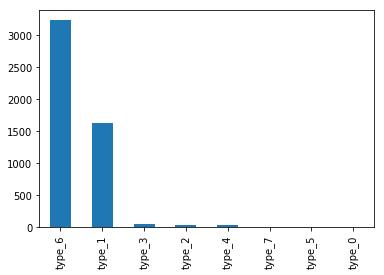

In [28]:
df_clients['type'].value_counts().plot.bar()


so from plot , mostly type-6 and type-1 are used 

check for the indication_coupon used 

In [29]:
indication_coupon=df_clients["indication_coupon"].value_counts()


top 10 indication_coupon used and their counts 

In [30]:
indication_coupon.head(10)

308    4229
41       61
116      48
36       20
181      18
102      16
48       14
103      14
177      10
29       10
Name: indication_coupon, dtype: int64

so from above data , 308 indication_coupon is used maximum times 

now check the transaction data

In [31]:
df_transactions.head(5)

,transaction_date,account,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts,count_deposits,count_withdrawals
0,2018-05-25,1093,NaN,NaN,NaN,3.15,0,0,1
1,2017-03-18,1093,7.50,6.50,100.0,NaN,72,1,0
2,2017-03-17,1093,48.63,38.51,1000.0,NaN,93,2,0
3,2018-12-10,2622,36.29,32.99,NaN,NaN,44,0,0
4,2018-12-09,2622,101.19,102.56,NaN,NaN,76,0,0


acount is the index to connect to client table, so we can join the table-> clients and transactions

In [32]:
df_client_trans=pd.merge(df_clients, df_transactions, on =['account'],how='inner')


lets check the data after joining two tables 

In [33]:
df_client_trans.head(5)


,account,type,residence,date_joined,indication_coupon,first_deposit_amount,first_deposit_date,first_transaction_amount,first_transaction_date,balance_amount,transaction_date,total_buy,total_sell,total_deposits,total_withdrawals,count_contracts,count_deposits,count_withdrawals
0,5019,type_6,ua,2018-06-18,308,9090.91,2018-06-18,NaN,NaN,9090.91,2018-06-18,NaN,NaN,9090.91,NaN,0,1,0
1,3655,type_6,ve,2017-09-04,83,9090.91,2017-09-04,0.120000,2017-09-04,-191834.62,2017-09-05,1642.89,717.48,NaN,100000.0,11,0,0
2,3655,type_6,ve,2017-09-04,83,9090.91,2017-09-04,0.120000,2017-09-04,-191834.62,2017-09-04,0.12,NaN,9090.91,100000.0,1,1,0
3,2809,type_6,br,2017-01-16,308,9090.91,2017-01-16,0.205556,2017-01-16,-3679886.14,2018-11-20,432.53,281.27,NaN,100000.0,84,0,0
4,2809,type_6,br,2017-01-16,308,9090.91,2017-01-16,0.205556,2017-01-16,-3679886.14,2018-11-19,27.23,16.10,NaN,100000.0,39,0,0


so now we have the  residence and transaction summery and total buy and sell in same table ,so we can check analyse country wise and make reports 

here i am assuming , the residence of clients and campaign conducted for the country will be same 

from the campaigns table i can see two campaigns for country "id" over laps , means the starting date is same , so we can combine this two campaigns and get the total spend ,which will be easy to compare with data we have 

In [60]:
df_campaigns_id=df_campaigns.loc[df_campaigns['country'] =="id" ]


In [61]:
df_campaigns_id

,start_date,end_date,total_spend,country
1,2017-01-04,2017-01-06,17696.41,id
4,2017-05-02,2017-05-03,15338.78,id
7,2017-06-20,2017-06-20,14269.43,id
12,2017-07-27,2017-07-30,26143.24,id
15,2017-09-01,2017-09-05,13731.69,id
23,2017-11-20,2017-11-22,5491.55,id
24,2017-11-24,2017-11-26,16456.49,id
25,2017-11-24,2017-11-28,15020.37,id
26,2018-01-19,2018-01-22,5533.58,id
27,2018-01-30,2018-01-31,11466.04,id


from above the number 24th and 25th have same starting data campaigns ,which we can combine together to avoid ambiguity

In [62]:
df_campaigns_id=df_campaigns_id.reset_index()
df_campaigns_id=df_campaigns_id.drop(['index'],axis=1)

In [63]:
#df_campaigns_id

In [64]:
for i in range (len(df_campaigns_id)-2):
    #print(i)
    if df_campaigns_id['start_date'][i]==df_campaigns_id['start_date'][i+1]:
        #print(i)
        df_campaigns_id['end_date'][i] = df_campaigns_id['end_date'][i+1]
        df_campaigns_id['total_spend'][i]=df_campaigns_id['total_spend'][i] + df_campaigns_id['total_spend'][i+1]
        df_campaigns_id=df_campaigns_id.drop(df_campaigns_id.index[i+1])
        df_campaigns_id=df_campaigns_id.reset_index()
        df_campaigns_id=df_campaigns_id.drop(['index'],axis=1)
      

/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
 #

In [66]:
df_campaigns_id

,start_date,end_date,total_spend,country
0,2017-01-04,2017-01-06,17696.41,id
1,2017-05-02,2017-05-03,15338.78,id
2,2017-06-20,2017-06-20,14269.43,id
3,2017-07-27,2017-07-30,26143.24,id
4,2017-09-01,2017-09-05,13731.69,id
5,2017-11-20,2017-11-22,5491.55,id
6,2017-11-24,2017-11-28,31476.86,id
7,2018-01-19,2018-01-22,5533.58,id
8,2018-01-30,2018-01-31,11466.04,id
9,2018-03-05,2018-03-07,12906.71,id


so now the campaigns data is fine for country "id"

so now we can extract all required data for country "id" from client-transactions table  

In [67]:
df_test_id=df_client_trans.loc[df_client_trans['residence'] =="id" ]

In [68]:
for i in range(len(df_campaigns_id)):
    #print(i)
    start_date=df_campaigns_id['start_date'][i]
    end_date=df_campaigns_id['end_date'][i]
    df_campaign_counter=df_test_id.loc[(df_test_id['transaction_date'] >= start_date) & (df_test_id['transaction_date'] <= end_date)]
    total_buy=df_campaign_counter['total_buy'].sum()
    total_sell=df_campaign_counter['total_sell'].sum()
    count_contracts=df_campaign_counter['count_contracts'].sum()
    print(start_date ," ", end_date," ", total_buy," ",total_sell," ", count_contracts,df_campaign_counter.type.value_counts())
    del start_date,end_date,total_buy,total_sell,count_contracts,df_campaign_counter


2017-01-04   2017-01-06   1426.5   1135.7   54 type_6    6
type_1    2
Name: type, dtype: int64
2017-05-02   2017-05-03   103699.68999999999   78543.92999999998   10334 type_6    19
type_1    12
Name: type, dtype: int64
2017-06-20   2017-06-20   12124.8   5462.650000000001   689 type_6    6
type_1    2
Name: type, dtype: int64
2017-07-27   2017-07-30   229420.44999999995   174151.21999999997   10510 type_6    67
type_1    20
Name: type, dtype: int64
2017-09-01   2017-09-05   523279.94000000006   408732.32999999996   11558 type_6    74
type_1    36
Name: type, dtype: int64
2017-11-20   2017-11-22   307850.18   240802.23   18017 type_6    63
type_1    12
Name: type, dtype: int64
2017-11-24   2017-11-28   384651.7   294318.64   23685 type_6    108
type_1     28
Name: type, dtype: int64
2018-01-19   2018-01-22   311620.18   252865.05   6130 type_6    72
type_1    22
Name: type, dtype: int64
2018-01-30   2018-01-31   255082.71   199387.61   4167 type_6    33
type_1    21
Name: type, dtype: 

##the above data which we got represnts  start date ,end date,total buy ,total sell ,count contracts and account type

#and i have copied them to csv file along with respective campaigns data for id , the report i will share once i have done for other 3 countries, ng,br,ru

In [71]:
#so lets analyse campaigns for br
#first get the client_transaction data filtered out and then compare with campaign data

In [72]:
df_test_br=df_client_trans.loc[df_client_trans['residence'] =="br" ]


In [73]:
df_campaigns_br=df_campaigns.loc[df_campaigns['country'] =="br" ]
df_campaigns_br=df_campaigns_br.reset_index()
df_campaigns_br=df_campaigns_br.drop(['index'],axis=1)

In [74]:
for i in range(len(df_campaigns_br)):
    #print(i)
    start_date=df_campaigns_br['start_date'][i]
    end_date=df_campaigns_br['end_date'][i]
    df_campaign_counter=df_test_br.loc[(df_test_br['transaction_date'] >= start_date) & (df_test_br['transaction_date'] <= end_date)]
    total_buy=df_campaign_counter['total_buy'].sum()
    total_sell=df_campaign_counter['total_sell'].sum()
    count_contracts=df_campaign_counter['count_contracts'].sum()
    print(start_date ," ", end_date," ", total_buy," ",total_sell," ", count_contracts,df_campaign_counter.type.value_counts())
    del start_date,end_date,total_buy,total_sell,count_contracts,df_campaign_counter


2017-09-10   2017-09-12   2015.48   1506.5900000000001   829 type_1    10
type_6     7
Name: type, dtype: int64
2017-10-02   2017-10-03   394.09   324.9699999999999   222 type_1    6
type_6    4
Name: type, dtype: int64
2018-03-02   2018-03-06   25546.98   19837.600000000002   3400 type_6    17
type_1    15
Name: type, dtype: int64
2018-10-29   2018-11-01   37692.26   28514.28   7429 type_6    15
type_1    14
Name: type, dtype: int64


In [75]:
#copied above br data to csv file created 

In [76]:
#so lets analyse campaigns for ng


In [77]:
df_test_ng=df_client_trans.loc[df_client_trans['residence'] =="ng" ]
df_campaigns_ng=df_campaigns.loc[df_campaigns['country'] =="ng" ]
df_campaigns_ng=df_campaigns_ng.reset_index()
df_campaigns_ng=df_campaigns_ng.drop(['index'],axis=1)

In [78]:
for i in range(len(df_campaigns_ng)):
    #print(i)
    start_date=df_campaigns_ng['start_date'][i]
    end_date=df_campaigns_ng['end_date'][i]
    df_campaign_counter=df_test_ng.loc[(df_test_ng['transaction_date'] >= start_date) & (df_test_ng['transaction_date'] <= end_date)]
    total_buy=df_campaign_counter['total_buy'].sum()
    total_sell=df_campaign_counter['total_sell'].sum()
    count_contracts=df_campaign_counter['count_contracts'].sum()
    print(start_date ," ", end_date," ", total_buy," ",total_sell," ", count_contracts,df_campaign_counter.type.value_counts())
    del start_date,end_date,total_buy,total_sell,count_contracts,df_campaign_counter


2017-02-13   2017-02-18   23532.920000000002   17124.54   177 type_6    4
Name: type, dtype: int64
2017-09-28   2017-09-28   2005.44   1717.37   253 type_1    1
type_6    1
Name: type, dtype: int64
2018-02-01   2018-02-05   4137.219999999999   2602.77   67 type_6    11
type_1     1
Name: type, dtype: int64
2018-06-04   2018-06-08   54720.98   40938.51   1102 type_6    18
type_1     1
Name: type, dtype: int64


#copied above to csv file

In [79]:
#now lets do same for ru

In [80]:
df_test_ru=df_client_trans.loc[df_client_trans['residence'] =="ru" ]
df_campaigns_ru=df_campaigns.loc[df_campaigns['country'] =="ru" ]
df_campaigns_ru=df_campaigns_ru.reset_index()
df_campaigns_ru=df_campaigns_ru.drop(['index'],axis=1)

In [81]:
for i in range(len(df_campaigns_ru)):
    print(i)
    start_date=df_campaigns_ru['start_date'][i]
    end_date=df_campaigns_ru['end_date'][i]
    df_campaign_counter=df_test_ru.loc[(df_test_ru['transaction_date'] >= start_date) & (df_test_ru['transaction_date'] <= end_date)]
    total_buy=df_campaign_counter['total_buy'].sum()
    total_sell=df_campaign_counter['total_sell'].sum()
    count_contracts=df_campaign_counter['count_contracts'].sum()
    print(start_date ," ", end_date," ", total_buy," ",total_sell," ", count_contracts,df_campaign_counter.type.value_counts())
    del start_date,end_date,total_buy,total_sell,count_contracts,df_campaign_counter


0
2017-05-25   2017-05-28   26565.969999999998   20353.040000000005   1655 type_6    14
type_1     7
Name: type, dtype: int64
1
2017-06-26   2017-06-30   8707.560000000001   6684.570000000001   470 type_6    13
type_1     4
Name: type, dtype: int64
2
2017-09-09   2017-09-11   2766.95   2076.93   682 type_6    13
type_1     3
Name: type, dtype: int64


In [82]:
## the above 4 countries data is saved in file report_country.csv file in my local , which i will share it 

so now read the csv file and plot the data we have got each campaigns , lets take start date as x -axis as , the campaigns started in different date so easy to interpret

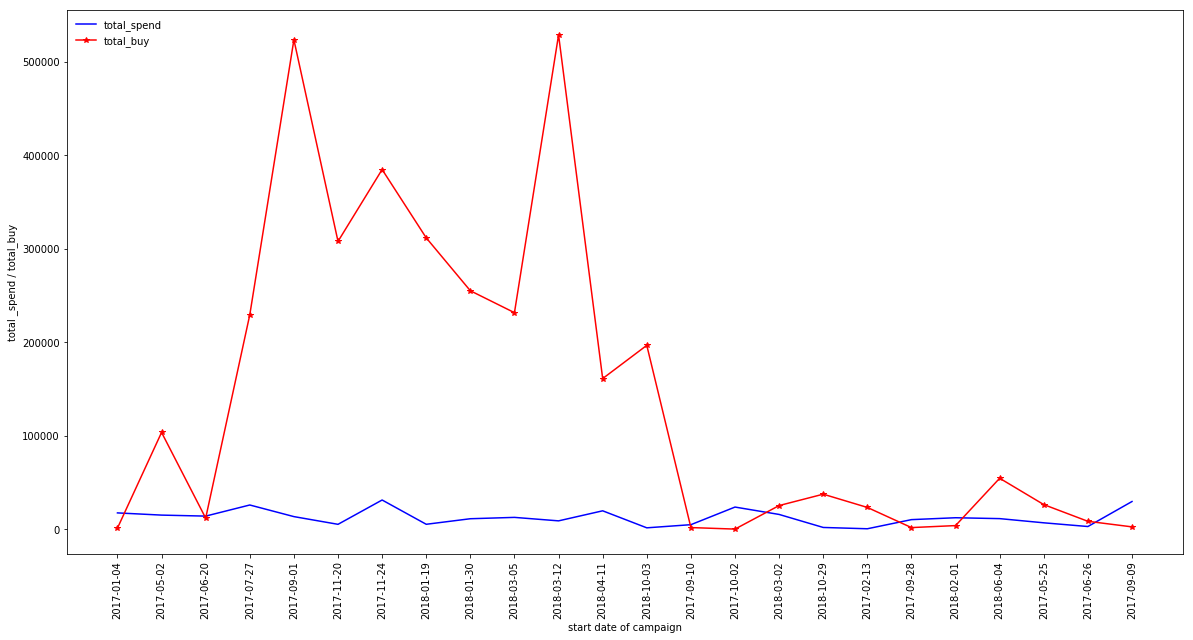

In [89]:
df_plot=pd.read_csv("report_country.csv")
fig , ax= plt.subplots(figsize=(20, 10))
ax.plot(df_plot.start_date,df_plot.total_spend,'-b', label='total_spend')
ax.plot(df_plot.start_date,df_plot.total_buy,'-*r', label='total_buy')
ax.set_xlabel("start date of campaign")
ax.set_ylabel("total _spend / total_buy")
plt.xticks(df_plot.start_date,rotation=90)
leg = ax.legend();
ax.legend(loc='upper left', frameon=False)
plt.show()

(from plot first 13 campaigns are for country -id , next 4 campaigns are for "br", next 4 for "ng",next 3 for "ru")
so from plot the campaigns on 2017-09-01 and 2018-03-12 , had the maximum buy  both are from country "id", whcih seems a good market for campaign,for country "br" which starts at 2017-09-10 , the maximum buy is for campaign at 2018-10-29, similarly "ng" start at 2017-02-13 , having maximum campaign buy at campaign 2018-06-04,

for country "ru" , the campaign started at 2017-05-25 and the maximum total buy is at campaign  2017-05-25

 

In [90]:
#so now to check the top indication coupon used for these 4 countries 

In [91]:
 
data_id_indication_coupon=df_test_id["indication_coupon"].value_counts()

#get the top indication coupons used 
data_id_indication_coupon.head(10)

308    12506
222      461
41       429
196      205
45       169
59       119
109      117
132      114
25       107
110      106
Name: indication_coupon, dtype: int64

it shows for country "id"  the 308   indication_coupon used maximum with 12506 times

In [92]:
 
data_br_indication_coupon=df_test_br["indication_coupon"].value_counts()

#get the top indication coupons used and their count
data_br_indication_coupon.head(10)

308    2571
36      281
123     182
181     130
149     106
247      76
173      71
89       56
79       46
152      34
Name: indication_coupon, dtype: int64

it shows same like "id" with 308 used max of 2571 times 

In [93]:
 
data_ng_indication_coupon=df_test_ng["indication_coupon"].value_counts()

#get the top indication coupons used and their count 
data_ng_indication_coupon.head(10)

308    1508
26       30
195       9
244       1
234       1
209       1
36        1
8         1
Name: indication_coupon, dtype: int64

it shows same like "id" with 308 used max of 1508 times

In [95]:
 
data_ru_indication_coupon=df_test_ru["indication_coupon"].value_counts()

#get the top indication coupons used and their count 
data_ru_indication_coupon.head(10)

308    1955
48      366
21      295
119     293
177      98
49       59
53       56
193      55
169      49
81       43
Name: indication_coupon, dtype: int64


it shows same like "id" with 308 used max of 1955 times
so from above data it looks like the indication_coupon 308 is mostly used during campaigns 


In [96]:
#        SUMMARY

from the data -> total spend for country ID  on all campaigns  -> 184,919.92
                   total buy during all this campaigns  ->  3,247,324 .51

    for country br -> total spend -------> 47229.13
                       total buy ------->65648.81
     for country ng -> total spend------>35351
                        total buy------->84396.56
     for country ru---> total spend----->40109.58
                        total buy-------->38040
        
        
   so from this , country "id"  and then country "ng" is more profitable for campaigns ,while country "ru" is not good .

        
        